In [6]:
from numpy import log
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from scipy.stats import norm, expon, lognorm
from seaborn import distplot, heatmap
from libs.ds_charts import bar_chart, get_variable_types, choose_grid, HEIGHT, multiple_bar_chart, multiple_line_chart

In [7]:
pd.plotting.register_matplotlib_converters()

filename = 'dataset_2/air_quality_tabular.csv'
data = pd.read_csv(filename, na_values='na')

data.shape

(169273, 32)

# Data Dimensionality

Number of records vs number of variables

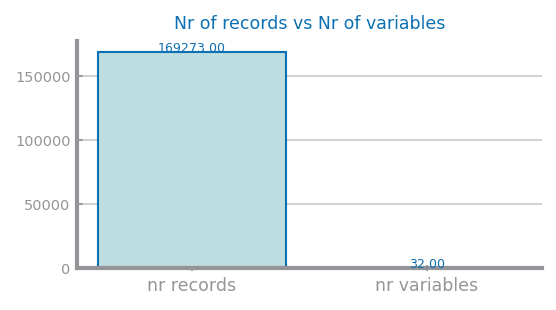

In [8]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
bar_chart(list(values.keys()), list(values.values()), title='Nr of records vs Nr of variables')
plt.savefig('dataset_2/profiling/dimensionality/records_vs_variables_ds2.png')

Number of variables per type

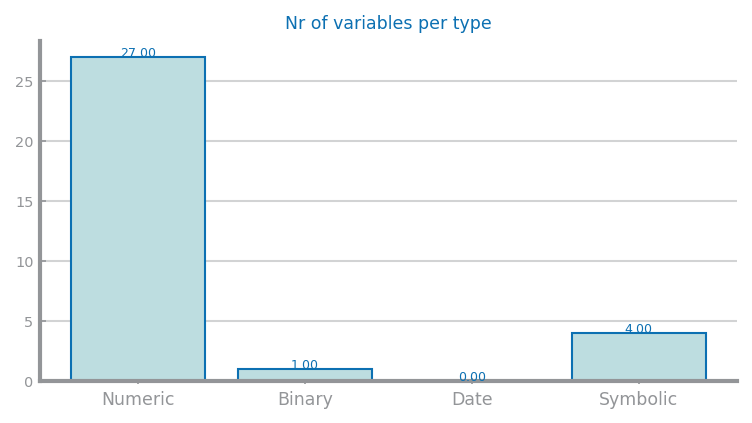

In [9]:
cat_vars = data.select_dtypes(include='object')
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
def get_variable_types(df: pd.DataFrame) -> dict:
    variable_types: dict = {
        'Numeric': [],
        'Binary': [],
        'Date': [],
        'Symbolic': []
    }
    for c in df.columns:
        uniques = df[c].dropna(inplace=False).unique()
        if len(uniques) == 2:
            variable_types['Binary'].append(c)
            df[c].astype('bool')
        elif df[c].dtype == 'datetime64':
            variable_types['Date'].append(c)
        elif c == "CRASH_DATE":
            variable_types['Date'].append(c)
        elif c == "CRASH_TIME":
            variable_types['Date'].append(c)
        elif df[c].dtype == 'int':
            variable_types['Numeric'].append(c)
        elif df[c].dtype == 'float':
            variable_types['Numeric'].append(c)
        else:
            df[c].astype('category')
            variable_types['Symbolic'].append(c)

    return variable_types

variable_types = get_variable_types(data)
counts = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])
plt.figure(figsize=(6,3))
bar_chart(list(counts.keys()), list(counts.values()), title='Nr of variables per type')
plt.savefig('dataset_2/profiling/dimensionality/variables_per_type_ds2.png')

Number of missing variables per variable

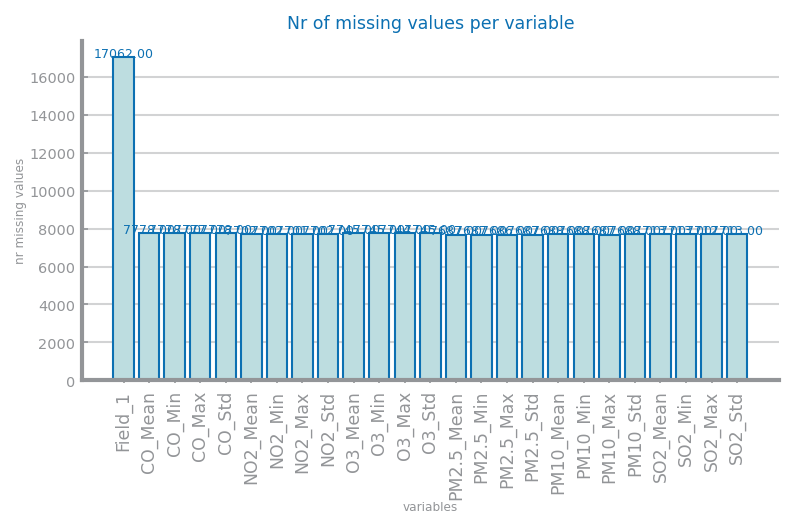

In [10]:
mv = {}
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plt.figure(figsize=(6,3))

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable',
            xlabel='variables', ylabel='nr missing values', rotation=True)
plt.savefig('dataset_2/profiling/dimensionality/missing_values_ds2.png',bbox_inches="tight")
plt.show()

# Data Granularity

Numeric variables

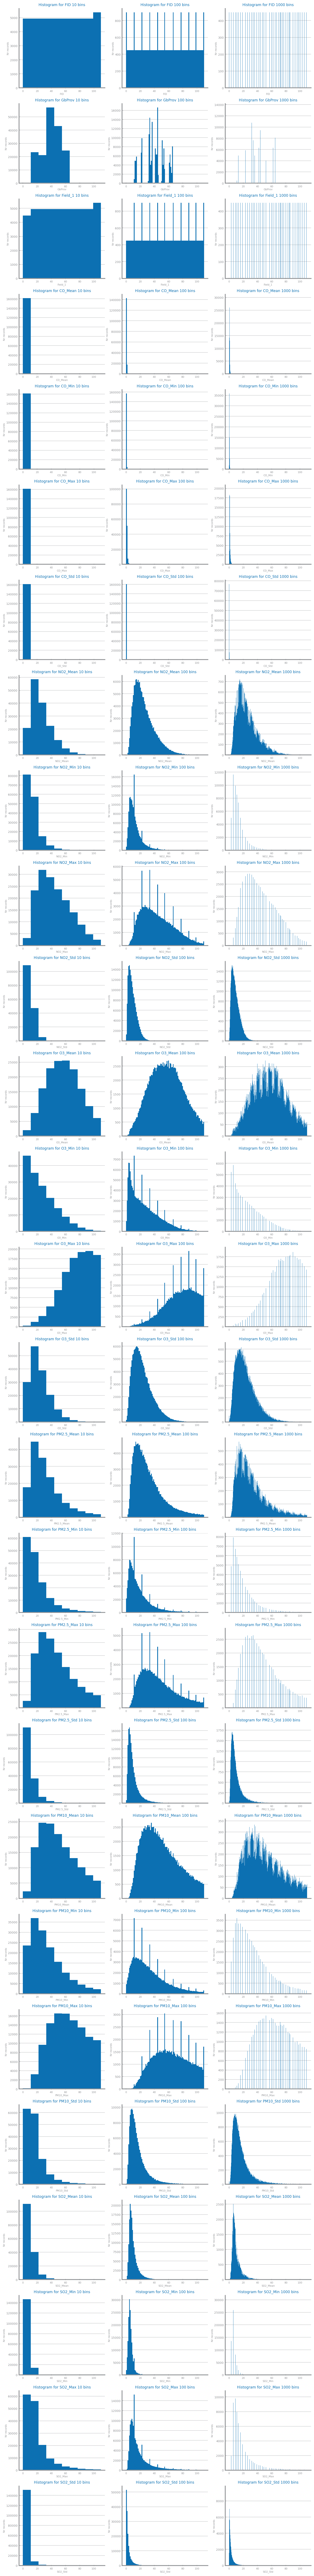

In [11]:
numeric_vars = get_variable_types(data)['Numeric']
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')
    
rows = len(numeric_vars)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(numeric_vars[i], bins[j]))
        axs[i, j].set_xlabel(numeric_vars[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[numeric_vars[i]].values, bins=bins[j], range=(0,110))
plt.savefig('dataset_2/profiling/granularity/granularity_study_numeric_variables_ds2.png')
plt.show()

Symbolic variables

##### LOCATION
	Country:
		City:
			Province

##### CRASH_DATE
	Year:
		Quarter:
			Month:
				Weekday:
					Day of month

# Data Distribution

In [12]:
summary5 = data.describe()
summary5

FID         GbProv        Field_1        CO_Mean  \
count  169273.000000  169273.000000  152211.000000  161495.000000   
mean    38697.082228      39.986737     170.000000       0.752409   
std    120353.768401      14.543213      97.860766       0.369792   
min         0.000000      11.000000       1.000000       0.100000   
25%        94.000000      32.000000      85.000000       0.529091   
50%       188.000000      41.000000     170.000000       0.680000   
75%       282.000000      51.000000     255.000000       0.879167   
max    659004.000000      65.000000     339.000000      30.190476   

              CO_Min         CO_Max         CO_Std       NO2_Mean  \
count  161495.000000  161496.000000  161495.000000  161571.000000   
mean        0.529502       1.123513       0.166635      25.703035   
std         0.246906       0.749282       0.206313      14.863372   
min         0.100000       0.100000       0.000000       1.458333   
25%         0.380000       0.710000       0.070739      14.666667   
50%         0.500000       0.950000       0.115361      22.291667   
75%         0.630000       1.300000       0.197949      33.541667   
max         3.670000      90.000000      42.291859     149.458333   

             NO2_Min        NO2_Max  ...      PM2.5_Max      PM2.5_Std  \
count  161571.000000  161572.000000  ...  161587.000000  161586.000000   
mean       13.071421      44.959455  ...      58.511675      10.978986   
std         9.717393      23.754584  ...      65.257636      15.457100   
min         1.000000       2.000000  ...       1.000000       0.000000   
25%         7.000000      26.000000  ...      28.000000       4.669642   
50%        10.000000      41.000000  ...      44.000000       7.642966   
75%        16.000000      60.000000  ...      71.000000      12.875917   
max       122.000000     382.000000  ...    5598.000000    1661.806341   

           PM10_Mean       PM10_Min       PM10_Max       PM10_Std  \
count  161585.000000  161585.000000  161586.000000  161585.000000   
mean       64.945750      37.643447     108.238486      20.043643   
std        78.707306      43.968002     163.648863      43.486010   
min         1.666667       1.000000       3.000000       0.000000   
25%        31.583333      15.000000      52.000000       8.336562   
50%        50.458333      28.000000      81.000000      13.336198   
75%        79.291667      48.000000     125.000000      21.604880   
max      6593.125000    3447.000000    9985.000000    4261.526598   

            SO2_Mean        SO2_Min        SO2_Max        SO2_Std  
count  161560.000000  161560.000000  161561.000000  161560.000000  
mean       10.468316       6.388020      20.019479       3.657845  
std         7.587371       3.584805      22.740546       5.513771  
min         1.000000       1.000000       1.000000       0.000000  
25%         6.000000       4.000000       8.000000       0.877971  
50%         8.375000       6.000000      13.000000       1.914401  
75%        12.375000       8.000000      23.000000       4.183093  
max       142.500000      93.000000     791.000000     211.468411  

[8 rows x 27 columns]

Boxplots for each numeric variable

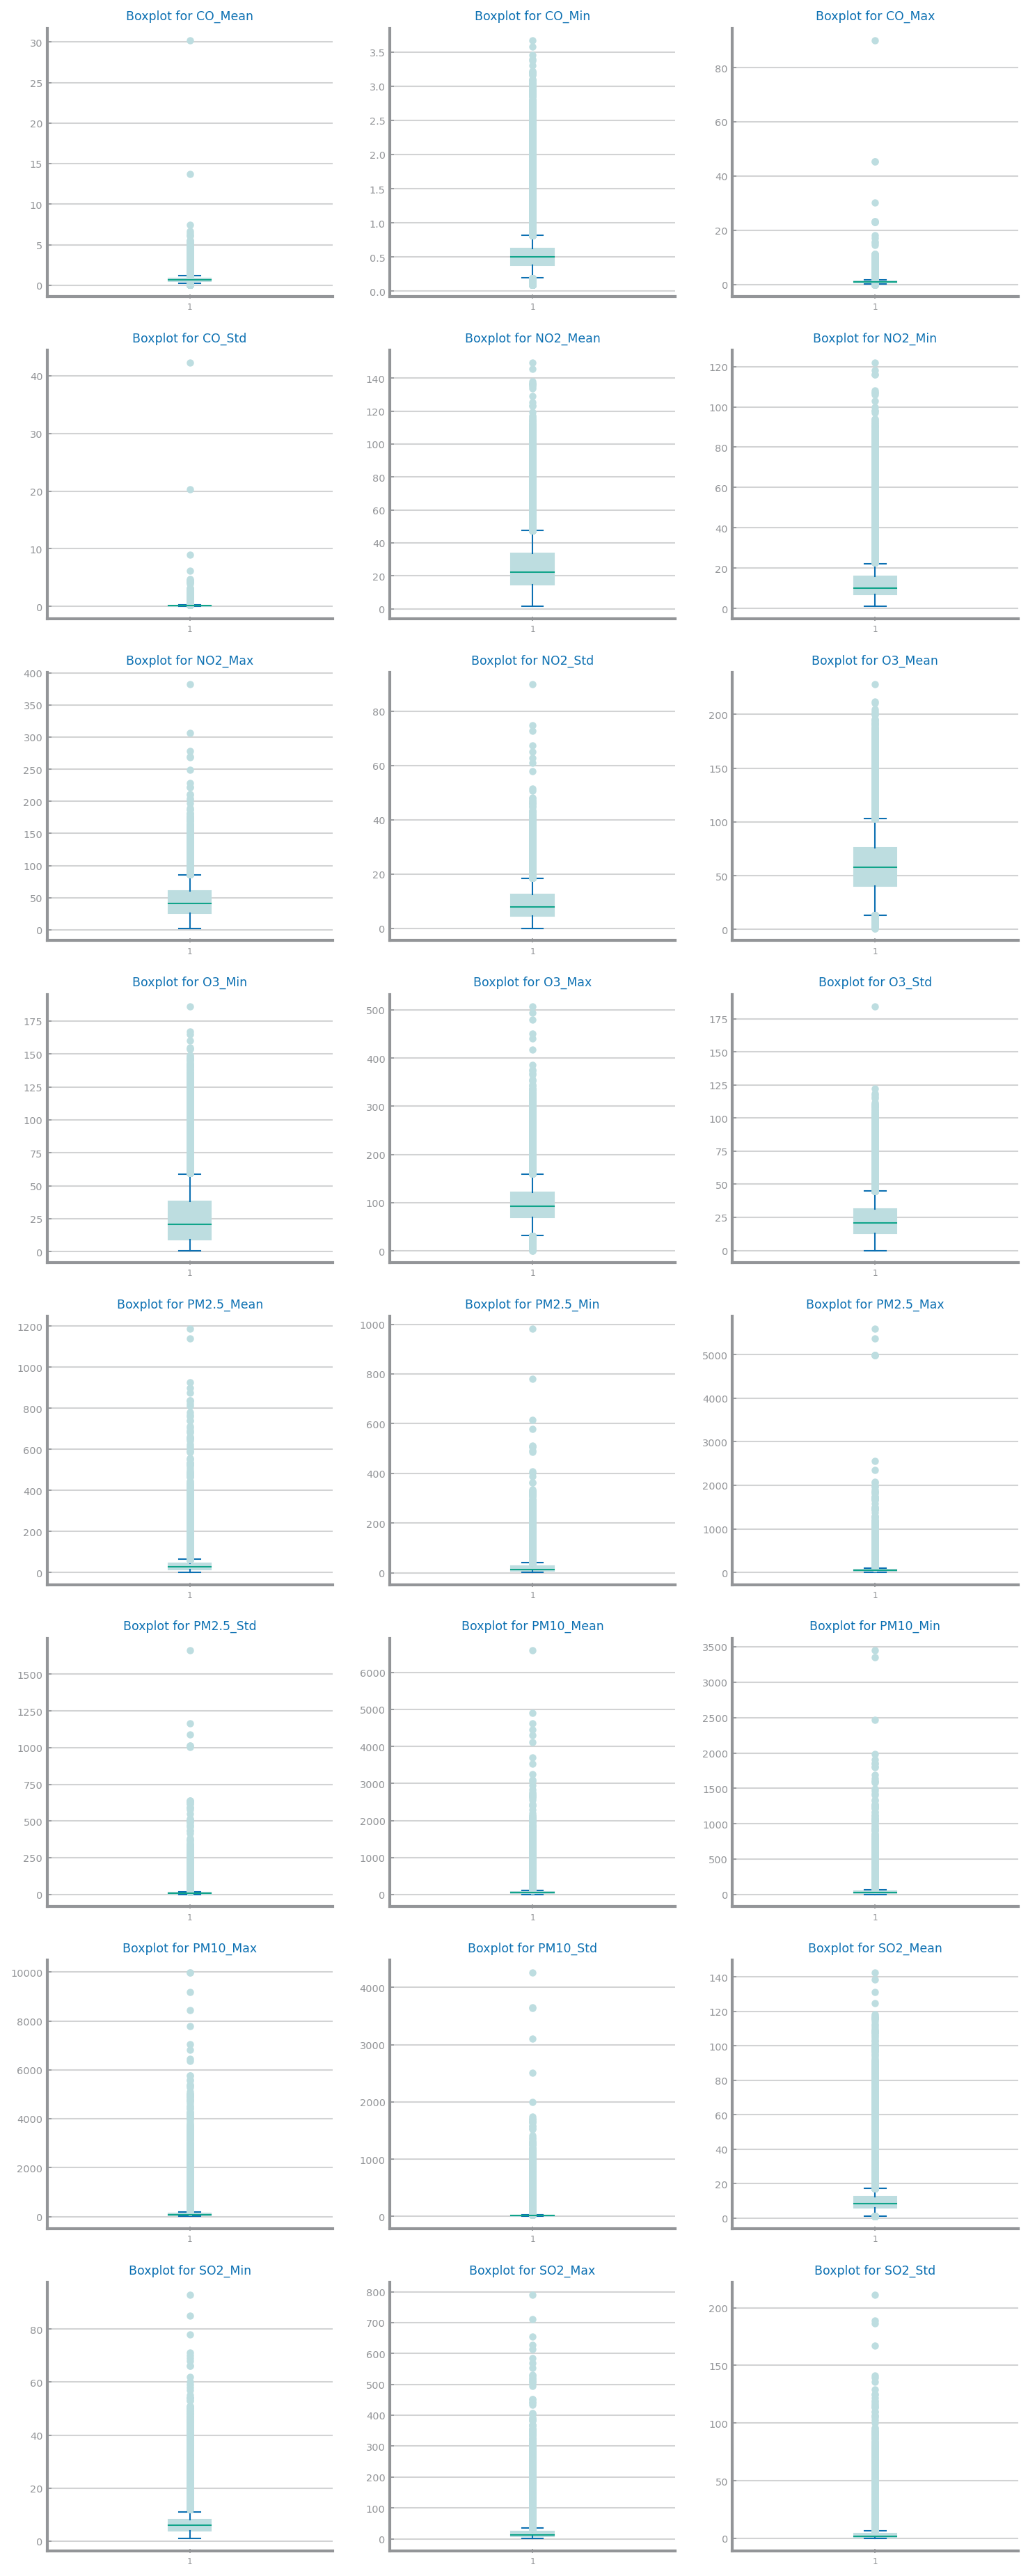

In [13]:
columns_numeric=['CO_Mean','CO_Min','CO_Max','CO_Std','NO2_Mean', 'NO2_Min', 'NO2_Max','NO2_Std', 'O3_Mean','O3_Min'
                              ,'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean',
                              'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
rows, cols = choose_grid(len(columns_numeric))
fig, axs = plt.subplots(rows,cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Boxplot for %s'%columns_numeric[n])
    axs[i, j].boxplot(data[columns_numeric[n]].dropna().values)
    i, j = (i +1, 0) if (n+1) % cols == 0 else (i, j+1)
plt.savefig('dataset_2/profiling/distribution/global_boxpot_ds2.png')

Outliers for each numeric variable

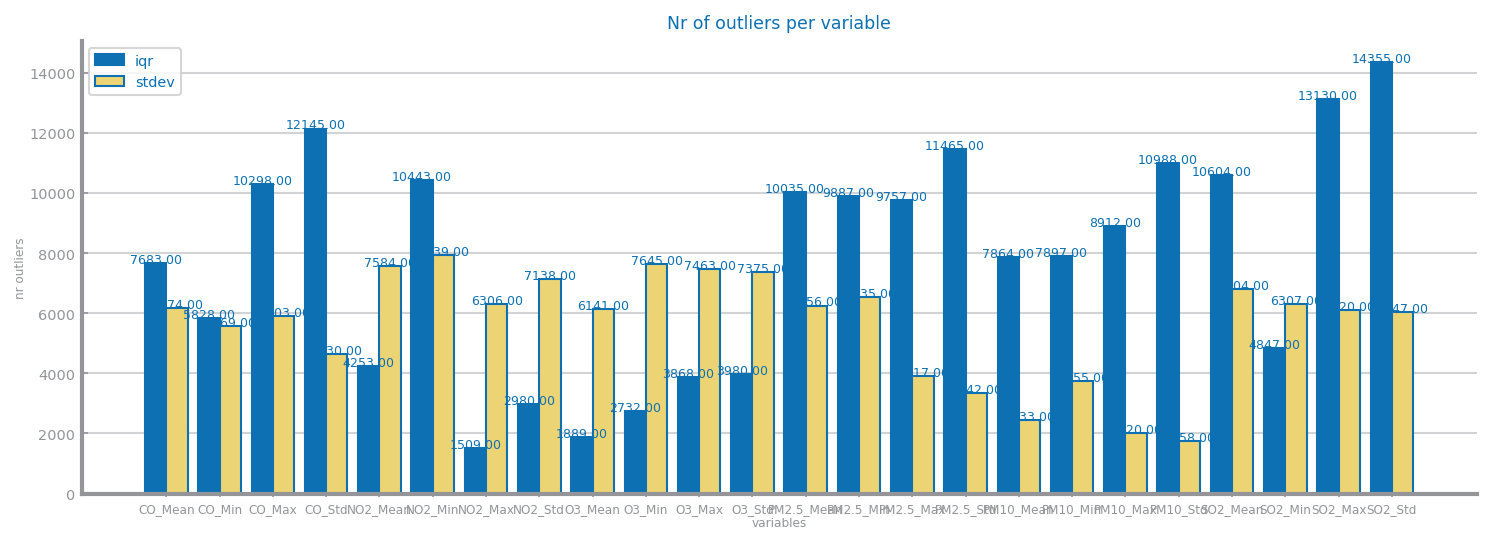

In [14]:
NR_STDEV: int = 2
outliers_iqr = []
outliers_stdev = []
summary5 = data.describe(include='number')

for var in columns_numeric:
    iqr = 1.5 * (summary5[var]['75%'] - summary5[var]['25%'])
    outliers_iqr += [
        data[data[var] > summary5[var]['75%']  + iqr].count()[var] +
        data[data[var] < summary5[var]['25%']  - iqr].count()[var]]
    std = NR_STDEV * summary5[var]['std']
    outliers_stdev += [
        data[data[var] > summary5[var]['mean'] + std].count()[var] +
        data[data[var] < summary5[var]['mean'] - std].count()[var]]

outliers = {'iqr': outliers_iqr, 'stdev': outliers_stdev}
plt.figure(figsize=(12, HEIGHT))
multiple_bar_chart(columns_numeric, outliers, title='Nr of outliers per variable', xlabel='variables', ylabel='nr outliers', percentage=False)
plt.savefig('dataset_2/profiling/distribution/outliers_per_numeric_variable_ds2.png')

Histogram for each numeric value

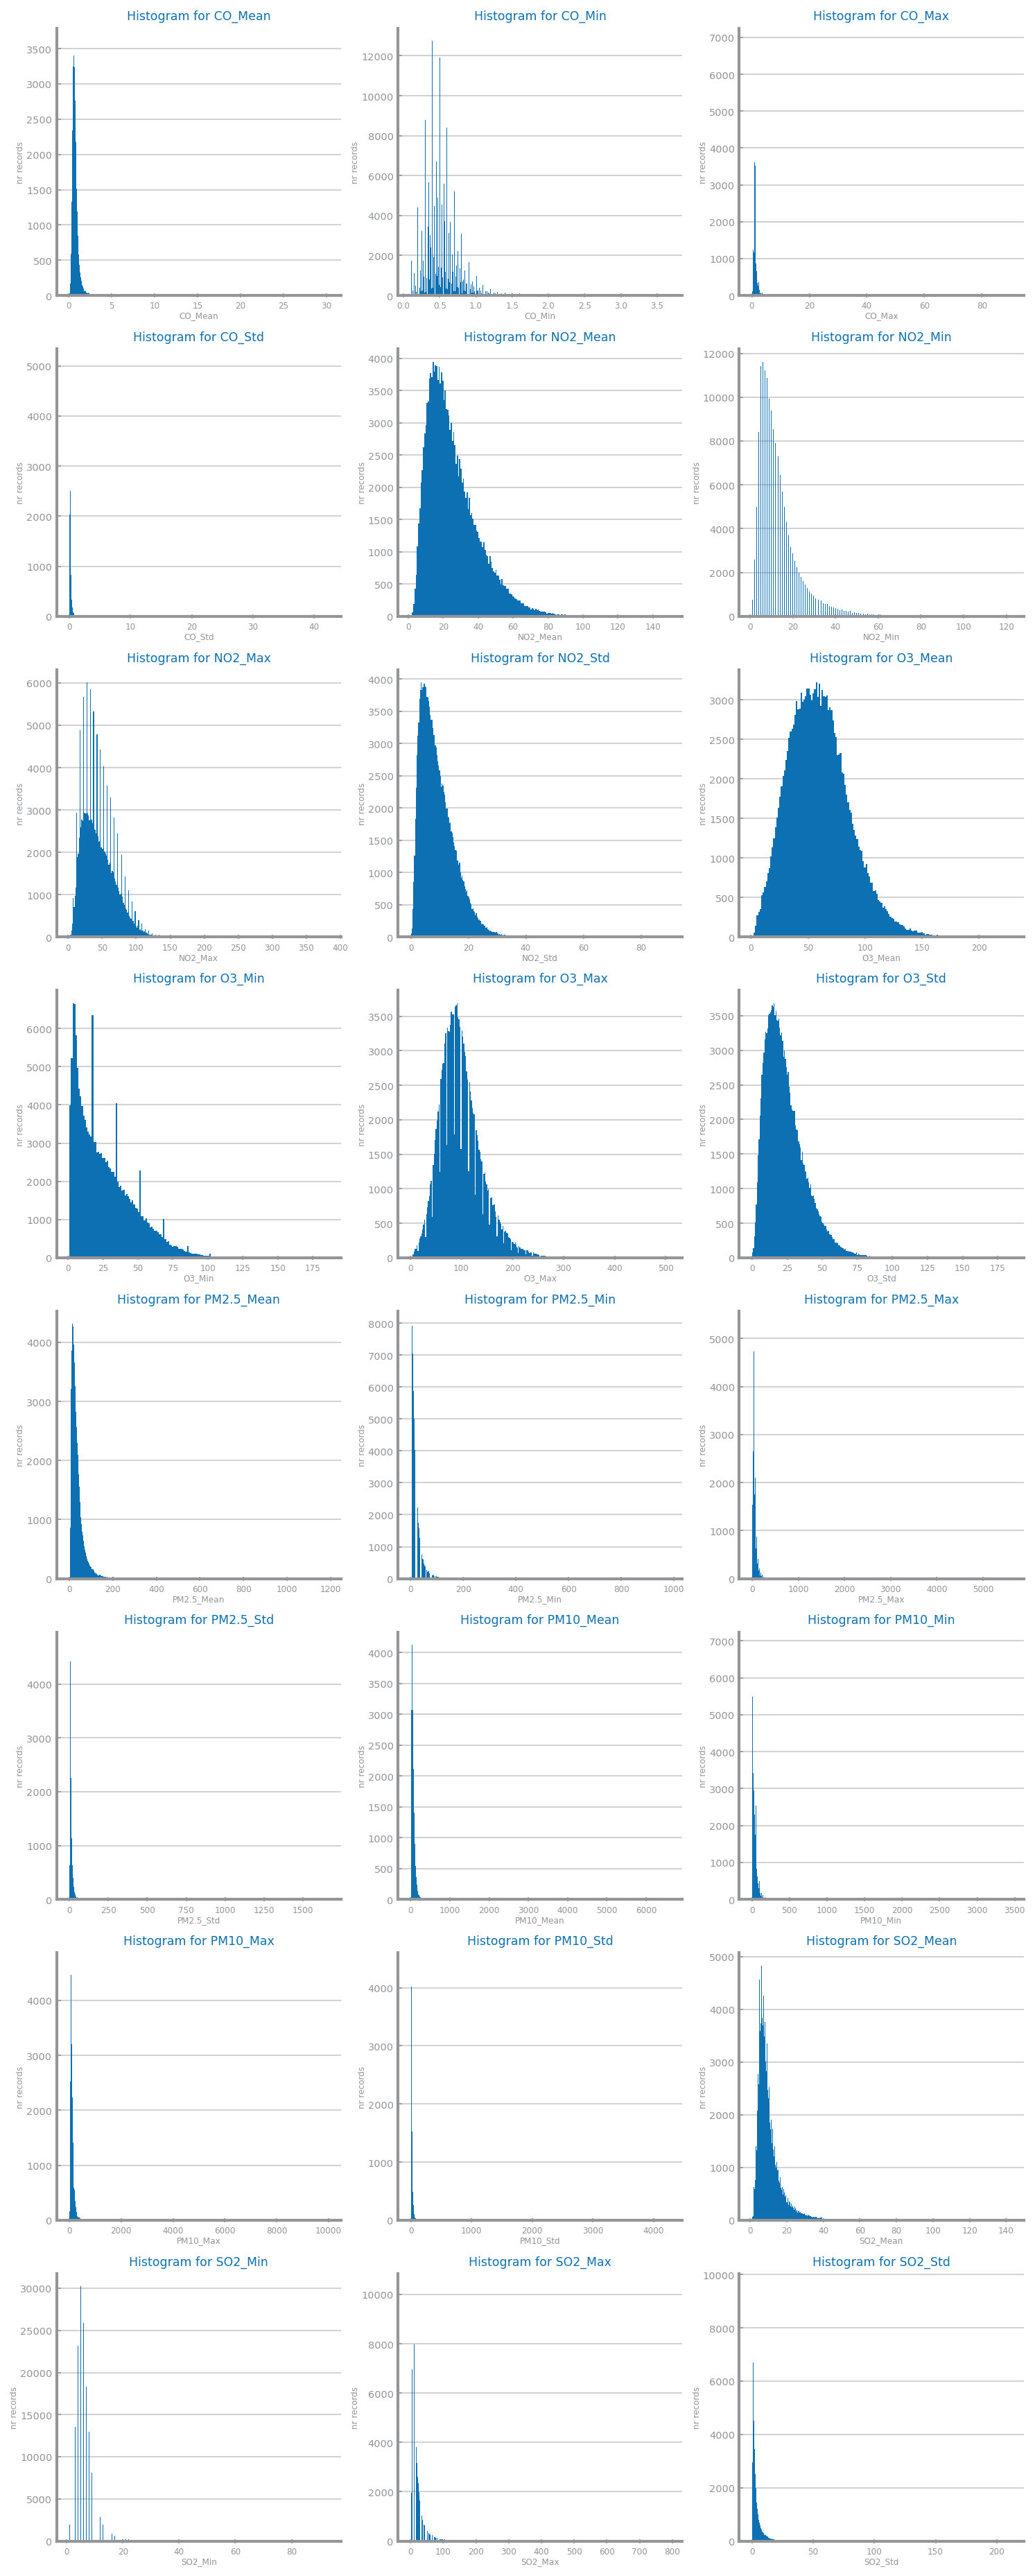

In [15]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze = False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Histogram for %s'%columns_numeric[n])
    axs[i, j].set_xlabel(columns_numeric[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[columns_numeric[n]].dropna().values, 'auto')
    i, j = ( i + 1, 0) if (n+1) % cols == 0 else (i, j+1)
plt.savefig('dataset_2/profiling/distribution/single_histograms_numeric_ds2.png')

Distribution of records per value

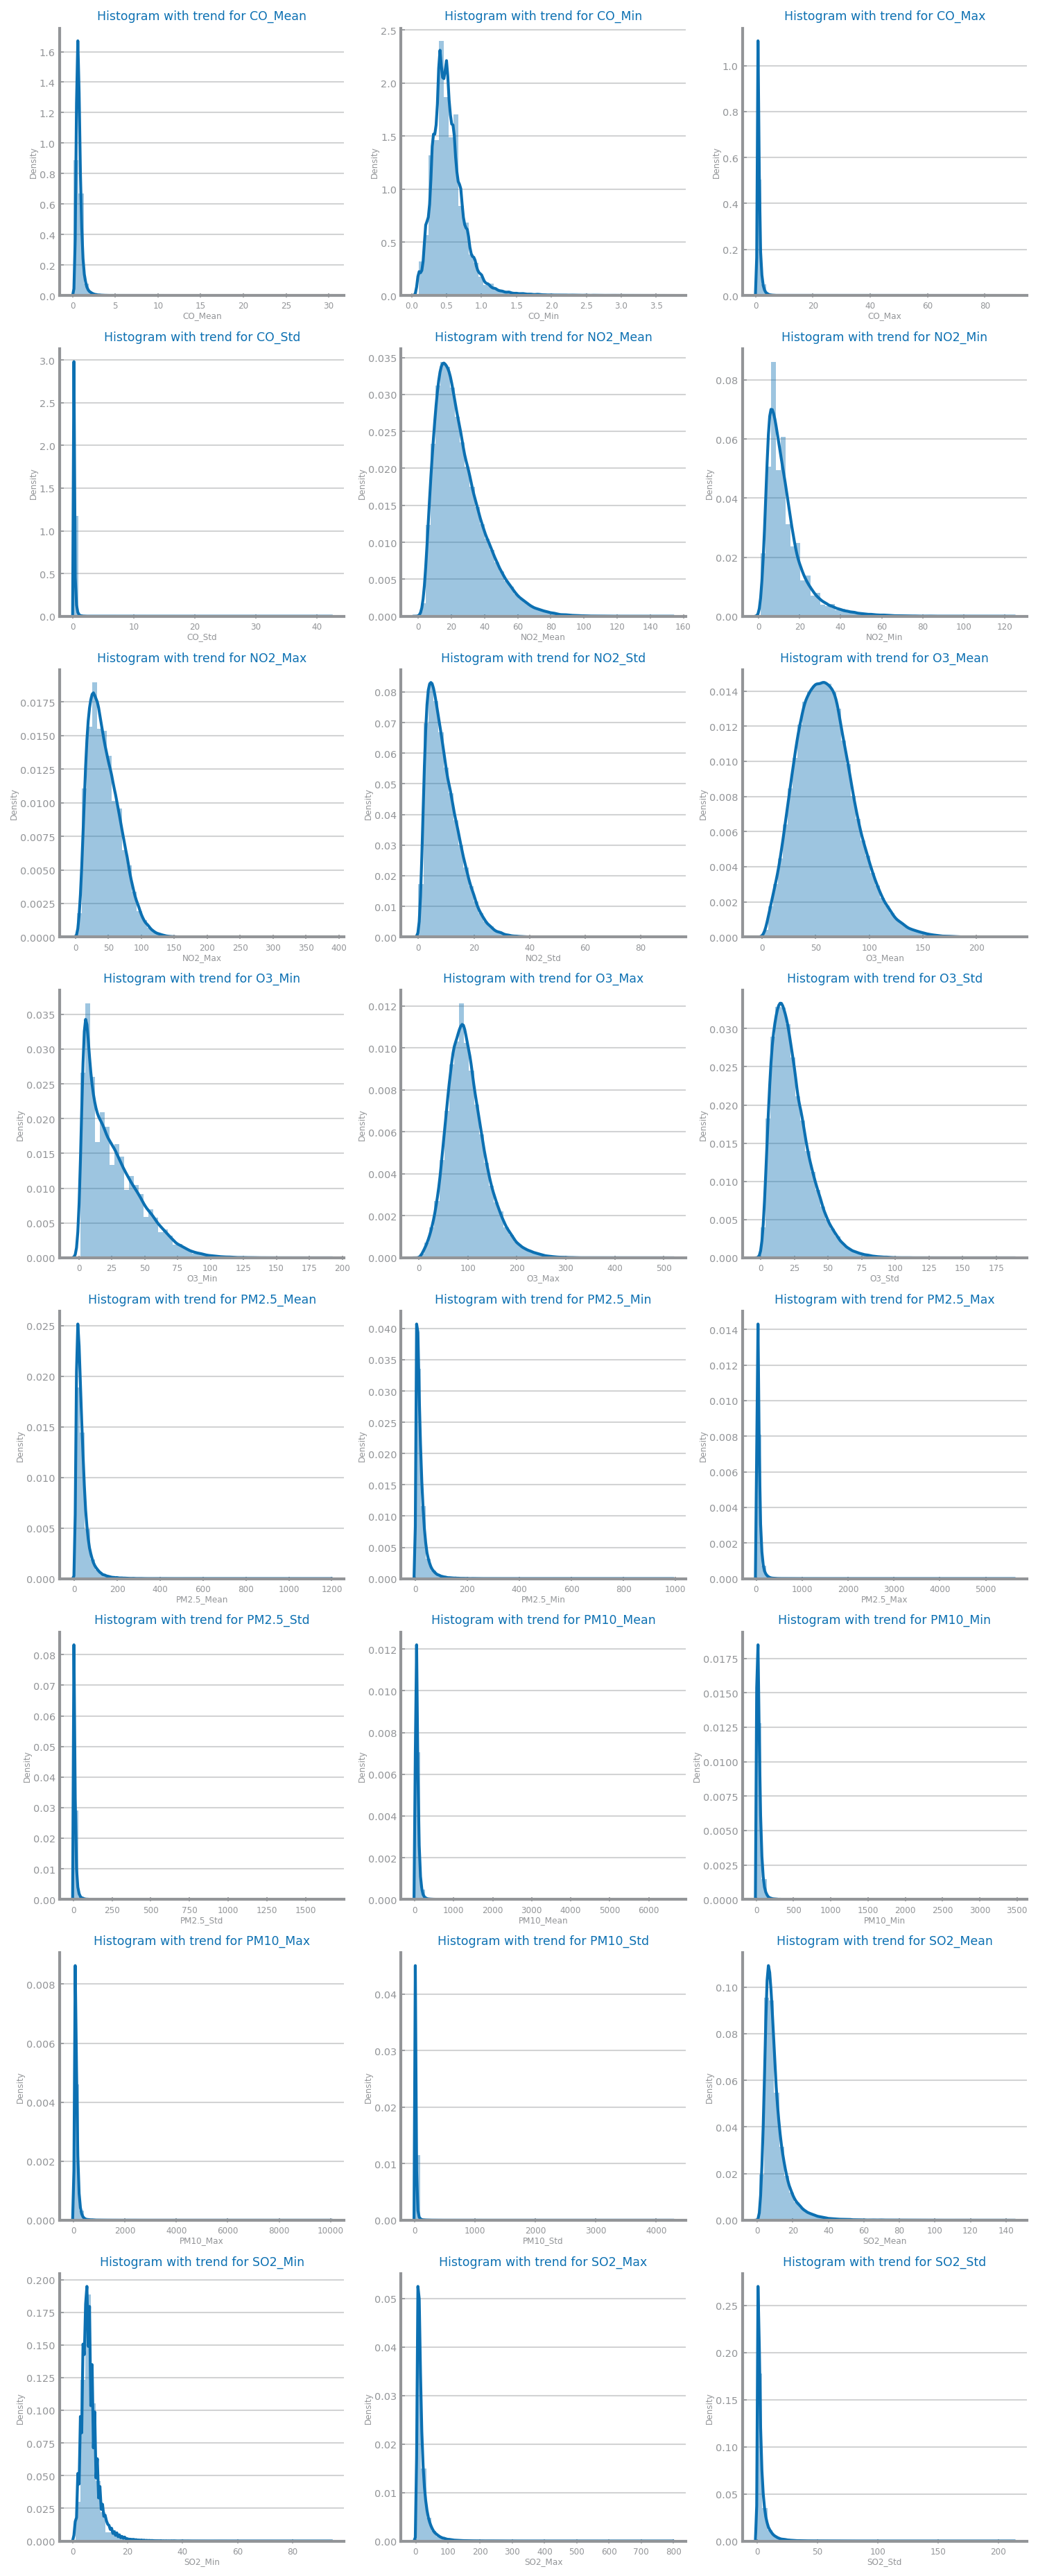

In [16]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze = False)
i, j = 0, 0
for n in range(len(columns_numeric)):
    axs[i, j].set_title('Histogram with trend for %s'%columns_numeric[n])
    distplot(data[columns_numeric[n]].dropna().values, norm_hist = True, ax=axs[i,j], axlabel= columns_numeric[n])
    i, j = (i +1, 0) if (n+1) %cols == 0 else (i, j+1)
plt.savefig('dataset_2/profiling/distribution/histograms_trend_numeric_ds2.png')

In [17]:
# def compute_known_distributions(x_values: list) -> dict:
#     distributions = dict()
#     # Gaussian
#     mean, sigma = norm.fit(x_values)
#     distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = norm.pdf(x_values, mean, sigma)
#     # Exponential
#     loc, scale = expon.fit(x_values)
#     distributions['Exp(%.2f)'%(1/scale)] = expon.pdf(x_values, loc, scale)
#     # LogNorm
#     #
#     sigma, loc, scale = lognorm.fit(x_values)
#     distributions['LogNor(%.1f,%.2f)'%(log(scale),sigma)] = lognorm.pdf(x_values, sigma, loc, scale)
#     return distributions

# def histogram_with_distributions(ax: Axes, series: pd.Series, var: str):
#     values = series.sort_values().values
#     ax.hist(values, 20, density=True)
#     distributions = compute_known_distributions(values)
#     multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

# fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
# i, j = 0, 0
# for n in range(len(columns_numeric)):
#     histogram_with_distributions(axs[i, j], data[columns_numeric[n]].dropna(), columns_numeric[n])
#     i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
# plt.savefig('dataset_2/profiling/distribution/histogram_numeric_distribution_ds2.png')

Symbolic variables

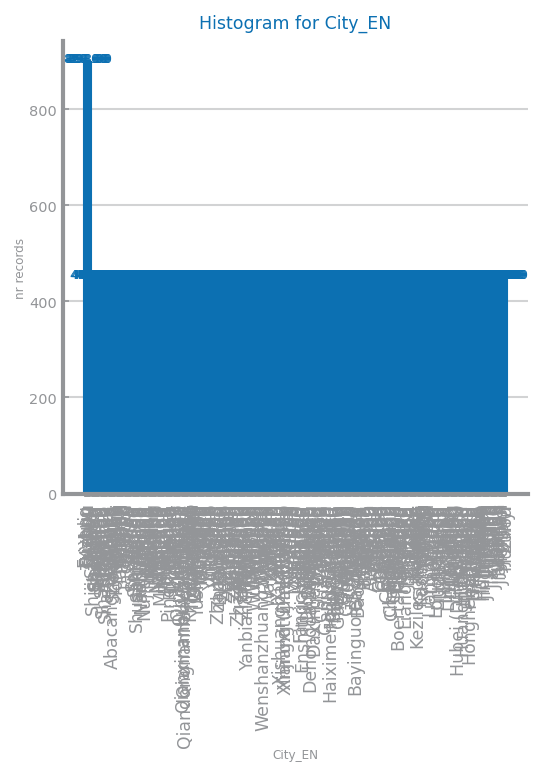

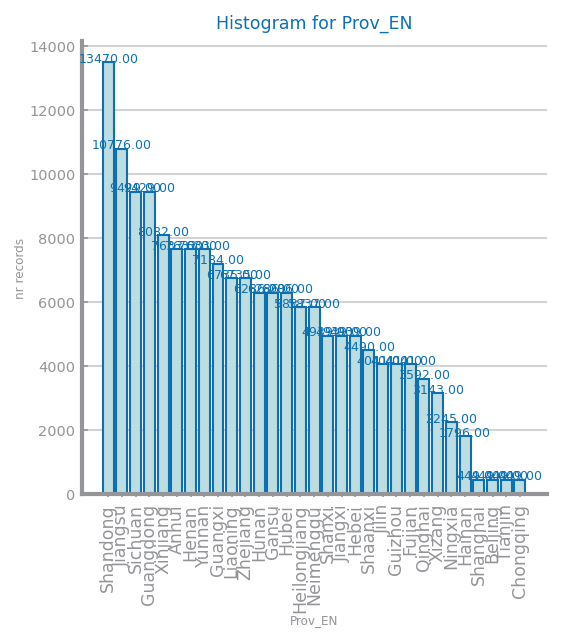

In [18]:
symbolic_vars = ['City_EN', 'Prov_EN'] # GB City numeric!(id); date?
for n in range(len(symbolic_vars)):
    rows, cols = choose_grid(1)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    i, j = 0, 0
    counts = data[symbolic_vars[n]].value_counts()
    bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n], xlabel=symbolic_vars[n], ylabel='nr records', percentage=False,
              rotation = True)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    plt.savefig('dataset_2/profiling/distribution/histograms_symbolic_ds2.png')

Class distribution

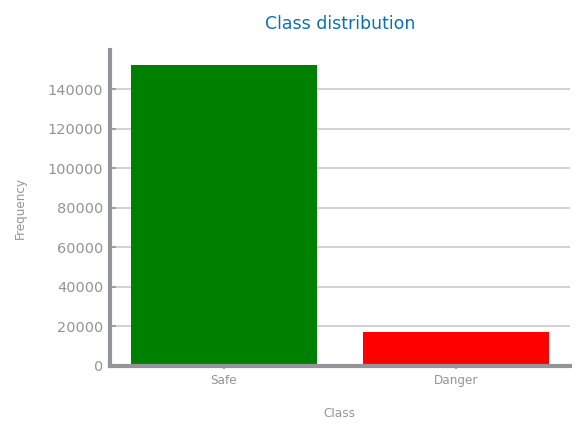

In [19]:
classes = data.ALARM.value_counts().to_dict()

plt.title('Class distribution', pad=10.0)
plt.ylabel('Frequency', labelpad=10.0)
plt.xlabel('Class', labelpad=10.0)
plt.bar(classes.keys(), classes.values(), color=['green', 'red'])
plt.tight_layout()

# Data Sparsity

Scatter plots for pairs

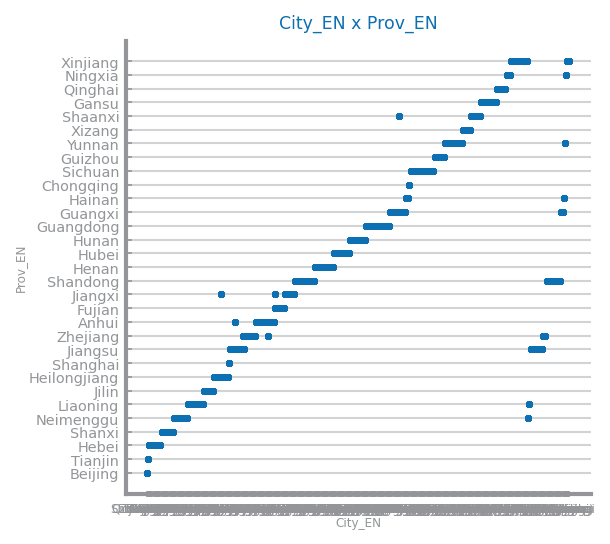

In [20]:
pd.plotting.register_matplotlib_converters()
if [] == symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars)-1, len(symbolic_vars)-1
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(symbolic_vars)):
    var1 = symbolic_vars[i]
    for j in range(i+1, len(symbolic_vars)):
        var2 = symbolic_vars[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)         
        # axs[i, j-1].scatter(data[var1].apply(str), data[var2].apply(str))
        axs[i, j-1].scatter(data[var1].astype(str), data[var2].astype(str))
plt.savefig('dataset_2/profiling/sparsity/sparsity_study_symbolic_ds2.png')
plt.show()

Scatter plots with class

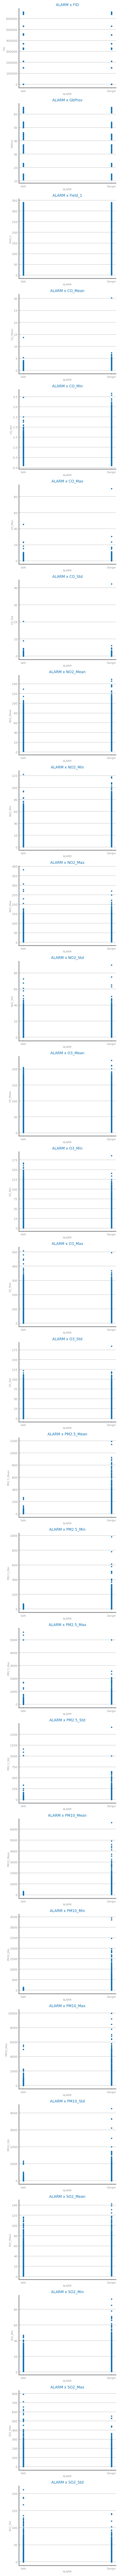

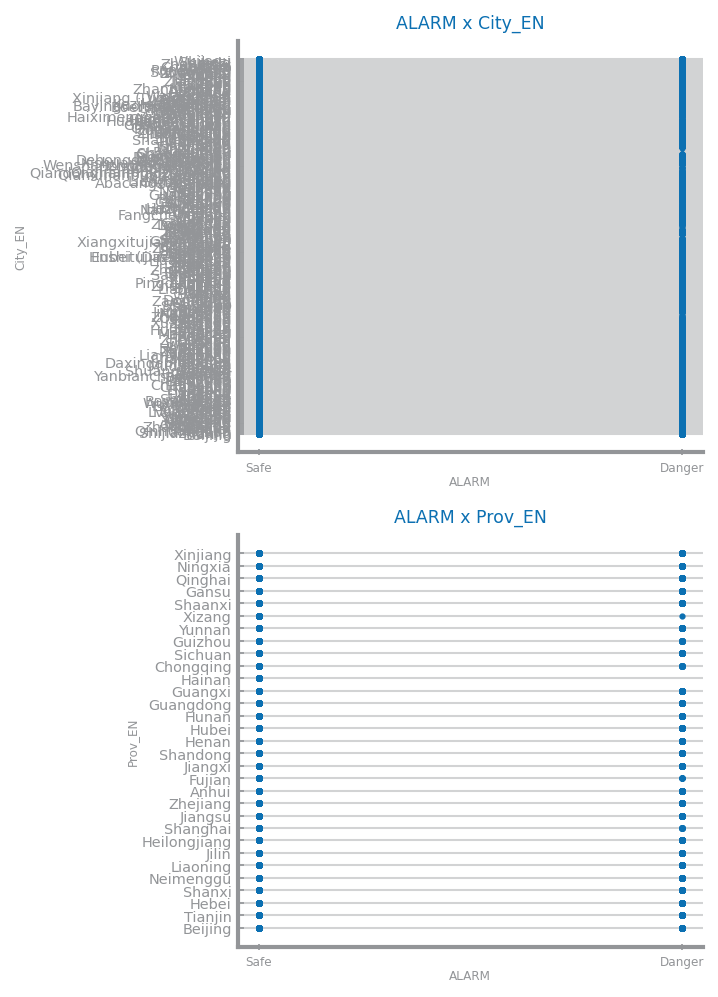

In [21]:
vars = list(data.columns)[:-1]
target = 'ALARM'

# Numeric Variables
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = len(numeric_vars), 1
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    axs[i, 0].set_title("%s x %s"%(target,var))
    axs[i, 0].set_xlabel(target)
    axs[i, 0].set_ylabel(var)
    axs[i, 0].scatter(data[target], data[var])
plt.savefig('dataset_2/profiling/sparsity/sparsity_class_numeric_ds2.png')

# Symbolic variables
if [] == symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars), 1
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(symbolic_vars)):
    var = symbolic_vars[i]
    axs[i, 0].set_title("%s x %s"%(target,var))
    axs[i, 0].set_xlabel(target)
    axs[i, 0].set_ylabel(var)
    axs[i, 0].scatter(data[target], data[var].apply(str))
plt.savefig('dataset_2/profiling/sparsity/sparsity_study_symbolic_ds2.png')

# Correlation

Correlation between all pairs

                 FID    GbProv   Field_1   CO_Mean    CO_Min    CO_Max  \
FID         1.000000  0.030057  0.031055  0.029930  0.033493  0.022097   
GbProv      0.030057  1.000000  0.013621  0.053600  0.007992  0.049447   
Field_1     0.031055  0.013621  1.000000  0.007411  0.010064  0.001911   
CO_Mean     0.029930  0.053600  0.007411  1.000000  0.819696  0.845236   
CO_Min      0.033493  0.007992  0.010064  0.819696  1.000000  0.498204   
CO_Max      0.022097  0.049447  0.001911  0.845236  0.498204  1.000000   
CO_Std      0.013383  0.059612  0.005012  0.654005  0.175580  0.902921   
NO2_Mean    0.048278  0.118018  0.069684  0.558526  0.425825  0.467998   
NO2_Min     0.025842  0.099601  0.070226  0.559891  0.554032  0.390676   
NO2_Max     0.061517  0.073259  0.045967  0.436260  0.267329  0.431041   
NO2_Std     0.058897  0.063885  0.023819  0.252799  0.042489  0.333615   
O3_Mean     0.049966  0.040411  0.020741  0.275408  0.241097  0.210133   
O3_Min      0.010544  0.002599  0.0436

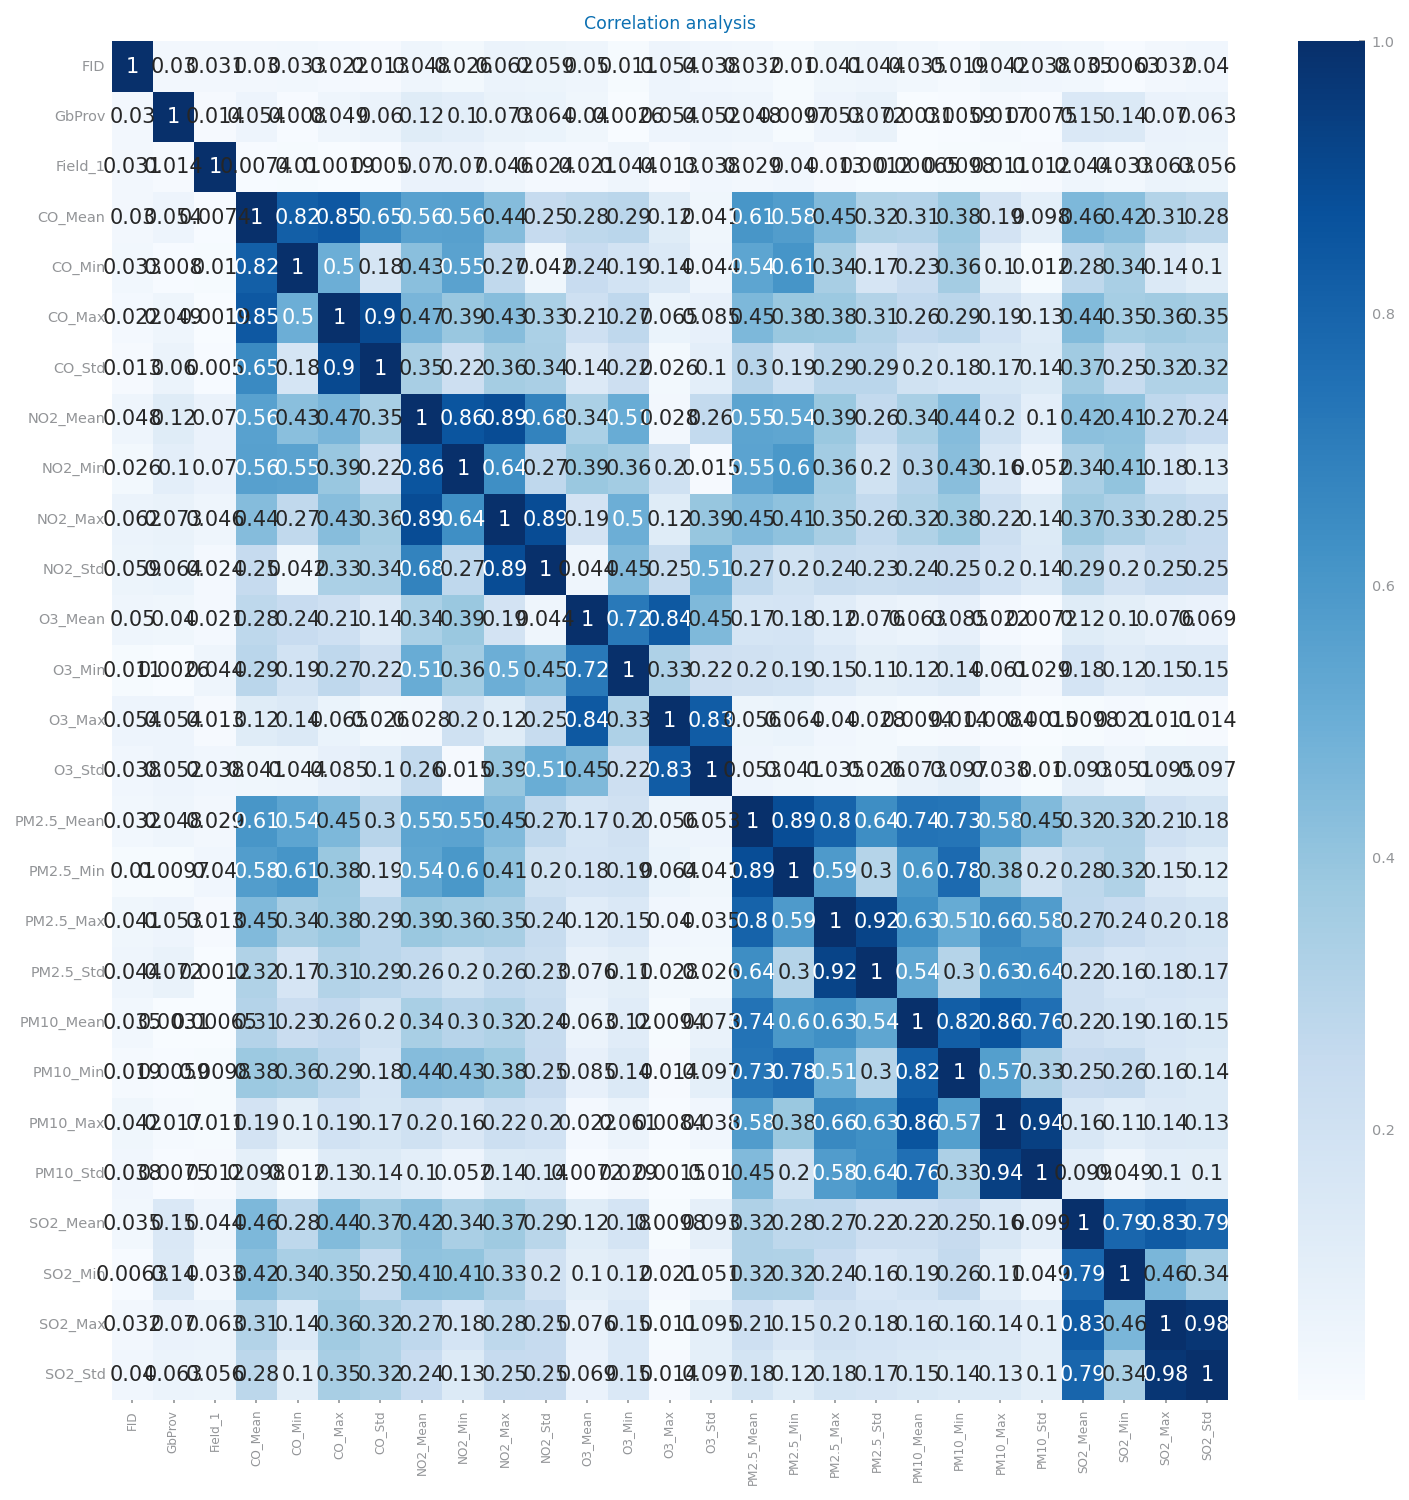

         City_EN  Prov_EN
City_EN  1.00000  0.79421
Prov_EN  0.79421  1.00000


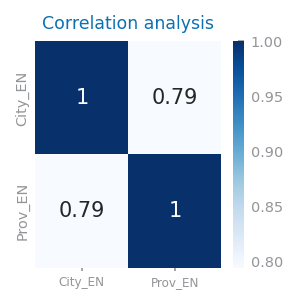

In [22]:
# Numeric variables
corr_mtx = abs(data.corr())
print(corr_mtx)
fig = plt.figure(figsize=[12, 12])

heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.savefig('dataset_2/profiling/correlation/correlation_analysis_numeric_ds2.png')
plt.show()

# Symbolic variables
just_symbolic = data[symbolic_vars].copy()
corr_mtx = just_symbolic.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
print(corr_mtx)
fig = plt.figure(figsize=[2, 2])

heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.savefig('dataset_2/profiling/correlation/correlation_analysis_symbolic_ds2.png')
plt.show()

Correlation with class

In [23]:
data_aux = pd.read_csv(filename, na_values='na')
for i in range(len(data_aux.ALARM)):
    if data_aux.ALARM[i] == 'Safe':
        data_aux.ALARM[i] = 0
    else:
        data_aux.ALARM[i] = 1
data_aux.ALARM = data_aux.ALARM.astype(str).astype('int64')

                 FID    GbProv   Field_1   CO_Mean    CO_Min    CO_Max  \
FID         1.000000  0.030057  0.031055  0.029930  0.033493  0.022097   
GbProv      0.030057  1.000000  0.013621  0.053600  0.007992  0.049447   
Field_1     0.031055  0.013621  1.000000  0.007411  0.010064  0.001911   
CO_Mean     0.029930  0.053600  0.007411  1.000000  0.819696  0.845236   
CO_Min      0.033493  0.007992  0.010064  0.819696  1.000000  0.498204   
CO_Max      0.022097  0.049447  0.001911  0.845236  0.498204  1.000000   
CO_Std      0.013383  0.059612  0.005012  0.654005  0.175580  0.902921   
NO2_Mean    0.048278  0.118018  0.069684  0.558526  0.425825  0.467998   
NO2_Min     0.025842  0.099601  0.070226  0.559891  0.554032  0.390676   
NO2_Max     0.061517  0.073259  0.045967  0.436260  0.267329  0.431041   
NO2_Std     0.058897  0.063885  0.023819  0.252799  0.042489  0.333615   
O3_Mean     0.049966  0.040411  0.020741  0.275408  0.241097  0.210133   
O3_Min      0.010544  0.002599  0.0436

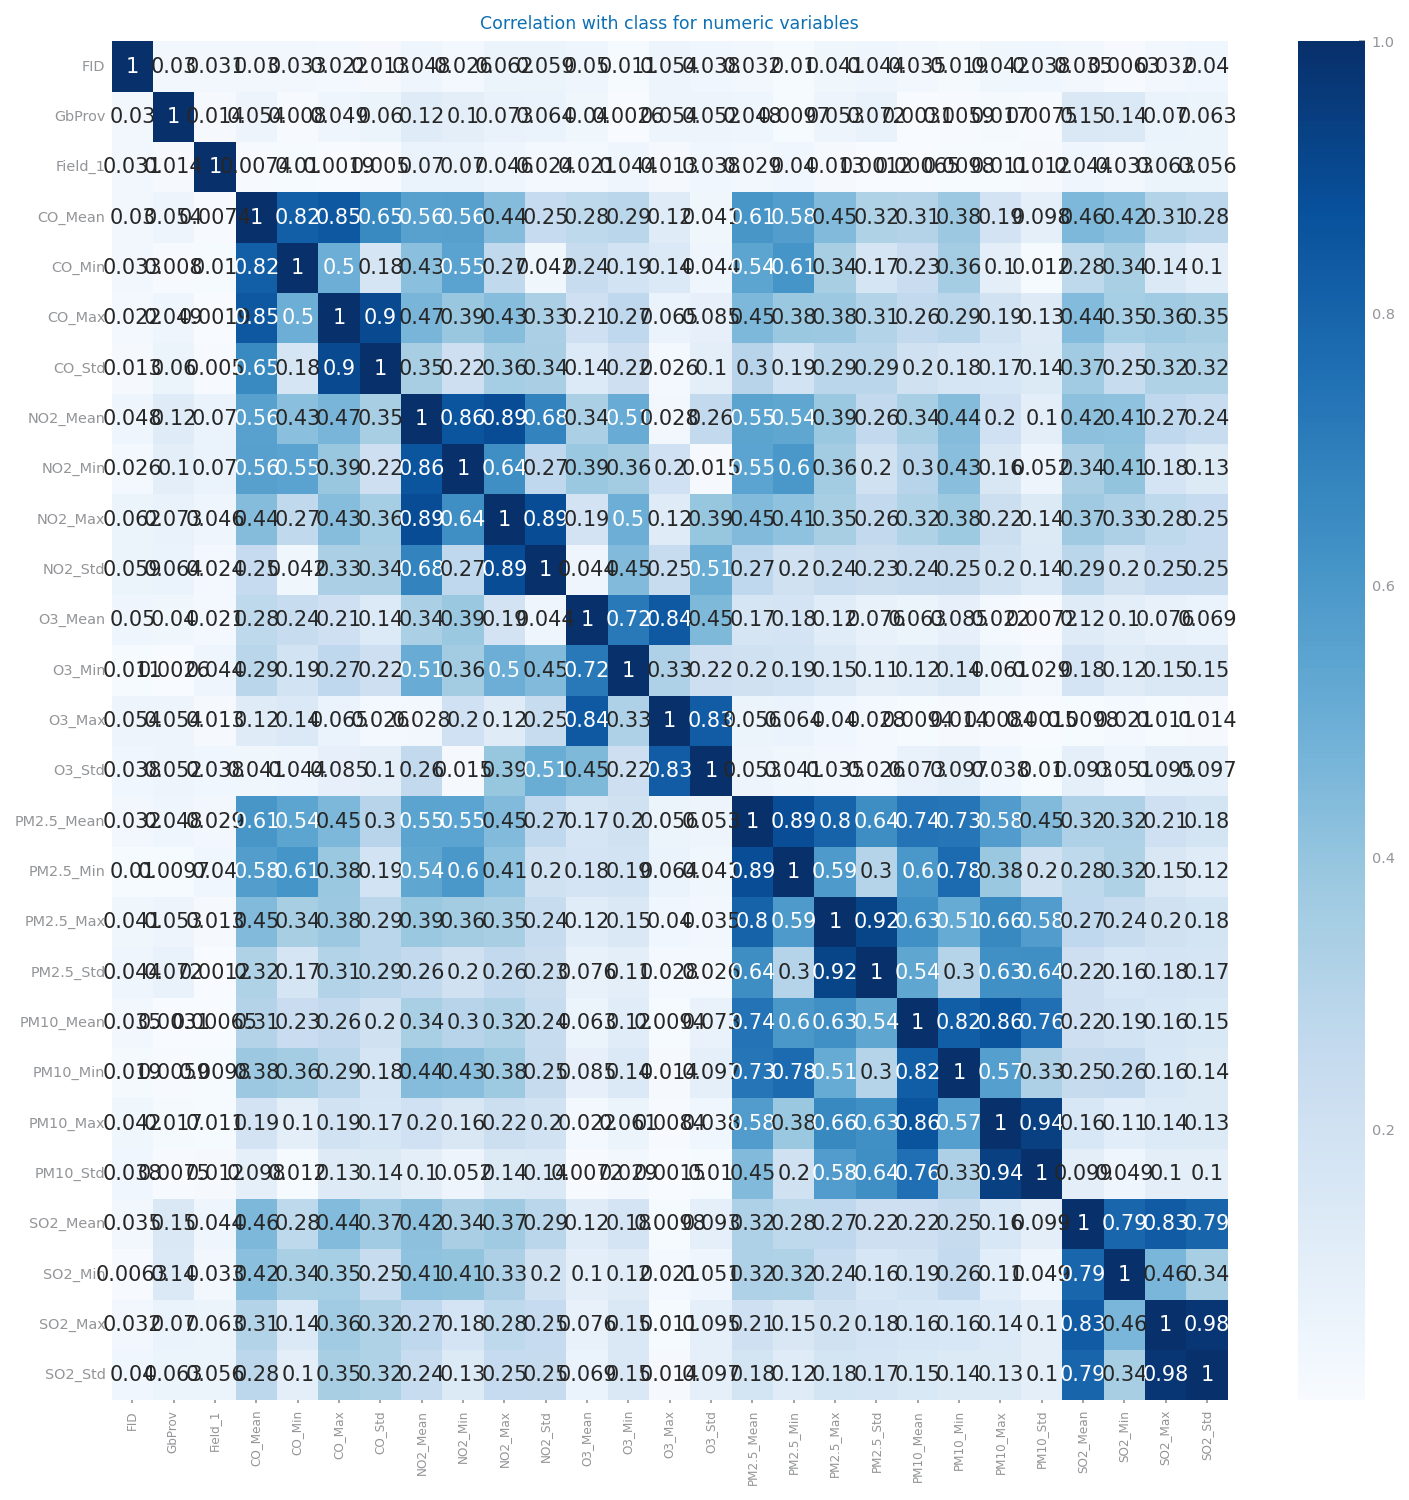

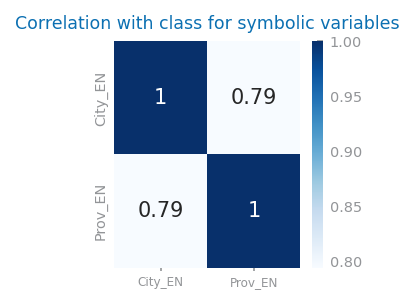

In [24]:
# Numeric variables
data_aux_numeric = data_aux[numeric_vars]
corr_mtx = pd.DataFrame(abs(data_aux_numeric.corr()))
print(corr_mtx)

fig = plt.figure(figsize=[12, 12])

heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.index.values, annot=True, cmap='Blues')
plt.title('Correlation with class for numeric variables')
plt.savefig('dataset_2/profiling/correlation/correlation_with_class_numeric_ds2.png')

# Symbolic variables
data_aux_symbolic = data_aux[symbolic_vars]
corr_mtx = data_aux_symbolic.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
print(corr_mtx)
fig = plt.figure(figsize=[2, 2])

heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation with class for symbolic variables')
plt.savefig('dataset_2/profiling/correlation/correlaton_with_class_symbolic_ds2.png')
plt.show()